In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

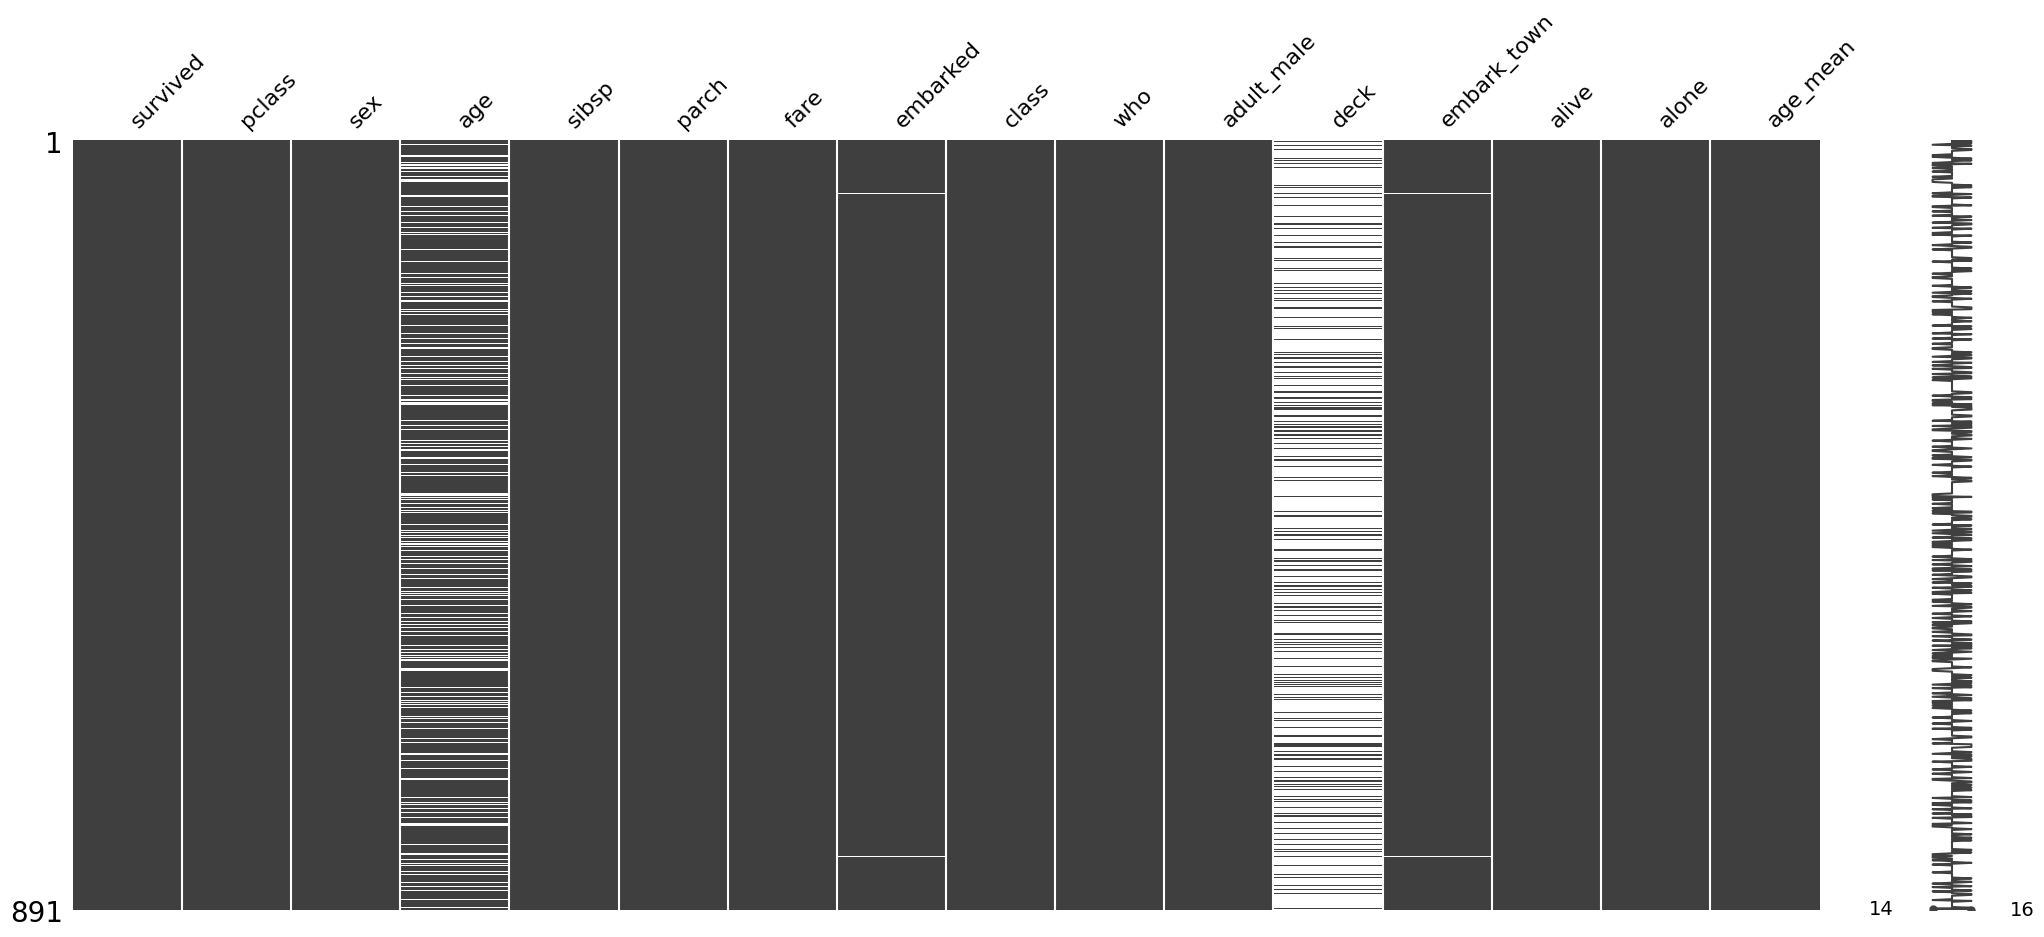

In [9]:
msno.matrix(df)

## 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

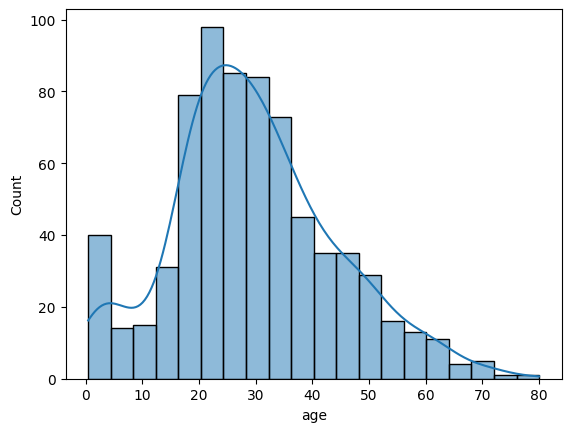

In [15]:
sns.histplot(df['age'],kde=True)

In [7]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [13]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: >

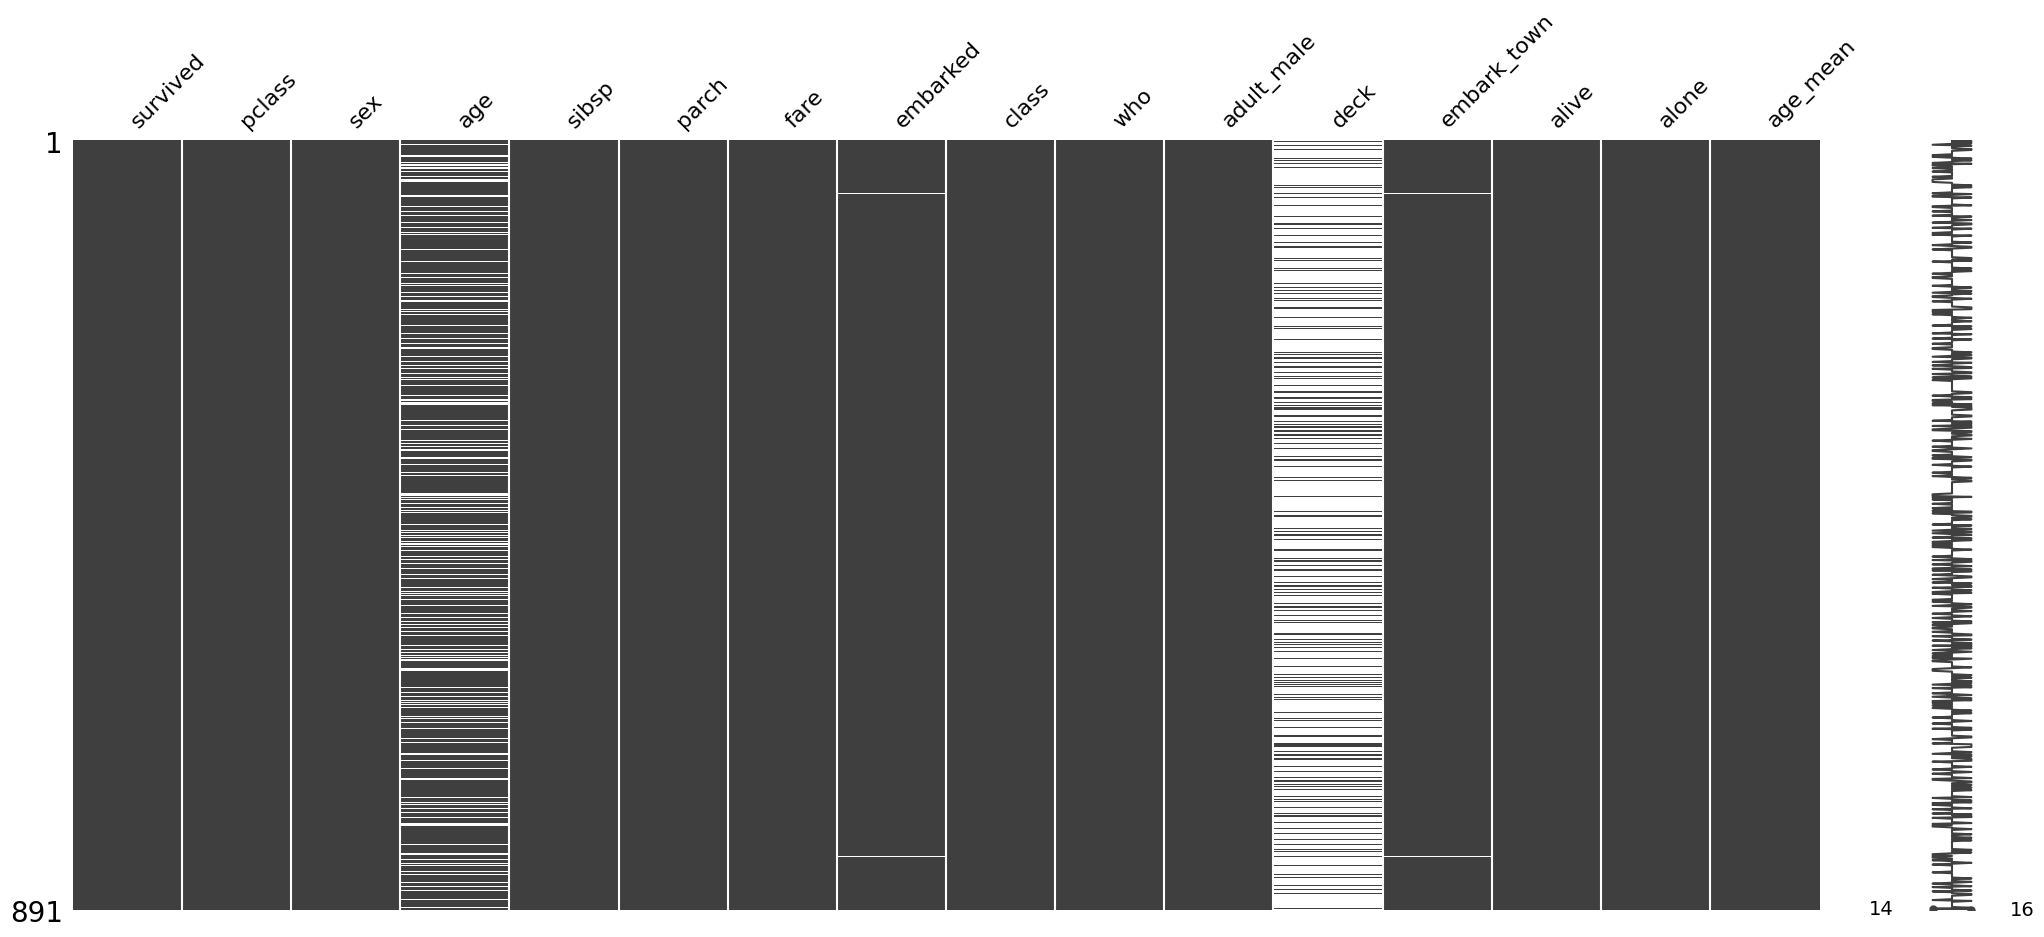

In [11]:
msno.matrix(df)

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
dtype: int64

**Mean imputation work well when we have normally distributed data**

## 2- Median Value Immputation - If we have outliners in the dataset

In [16]:
df['age_median']=df['age'].fillna(df['age'].median())

In [17]:
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


## 3 - Mode Value Imputation
**Caterogical Value**

In [19]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [20]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [31]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [32]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [37]:
print(df['embarked'].isnull().sum())
print(df['embarked_mode'].isnull().sum())

2
0


<Axes: >

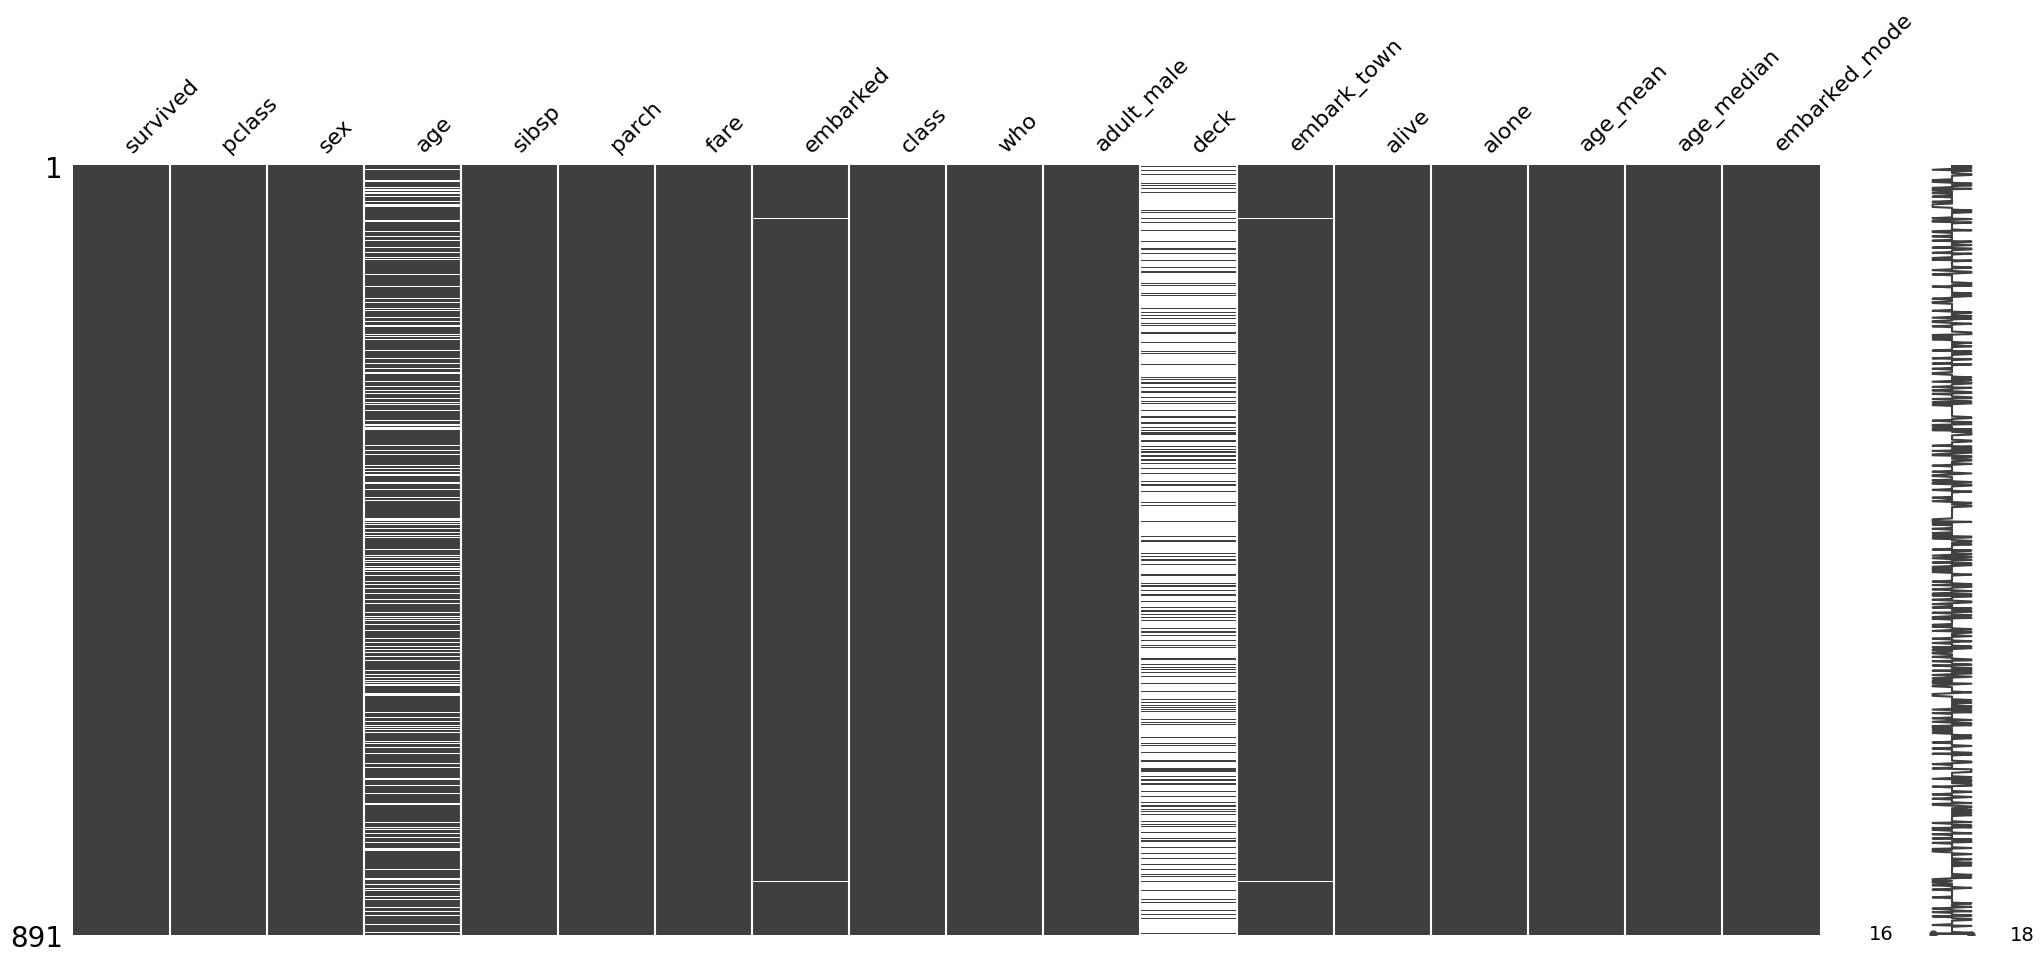

In [38]:
msno.matrix(df)